In [19]:
import gym
import numpy as np
env = gym.make('FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True)
gamma = 0.9

#Obtaining environment details 
# print('Number of Actions', env.action_space.n) 
# print('Number of States ', env.observation_space.n)
# print('P[10,2]', env.P[10][2])

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of Tabular Q learning iteration with value function values and directions')
#     print('Value Function',value_func)
#     print('Policy',policy_int)
#     plt.show()

test_value = np.random.rand(16) #Random Value Function (only for plotting)
test_policy = np.random.randint(0,3,16) #Random Policy (only for plotting)
# fancy_visual(test_value,test_policy)

In [20]:
import pandas as pd
state = env.reset()
alpha=0.1
epsilon=0.75
max_itr=20000
max_step = 50 
action=0
Gk=[]

window_size=500
norm2=[]
Qstar=np.array([[0.06889090266725063, 0.06664800287174974, 0.06664800287174974, 0.05975891219488077], [0.03909164153142022, 0.042990198887002104, 0.04074729909150122, 0.06141456975496177], [0.07440976085341801, 0.06882902867544147, 0.07272758603102336, 0.057489495137066235], [0.03906512426910657, 0.03906512426910657, 0.033484392091130036, 0.05580732031467159], [0.09185453801345594, 0.07118726734999539, 0.06429817667312641, 0.04822363200379008], [0.0, 0.0, 0.0, 0.0], [0.11220820590238607, 0.08988527767884452, 0.11220820590238607, 0.022322928223541552], [0.0, 0.0, 0.0, 0.0], [0.07118726734999539, 0.11787999215880772, 0.10180544748947139, 0.14543635349913725], [0.1576116762113231, 0.24749695389016763, 0.20386604788050178, 0.13351618368851037], [0.29961759227708273, 0.26595513051516595, 0.2253685061279409, 0.10791154791105864], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.1882298563507991, 0.3056868145676814, 0.37993590071682326, 0.26595513051516595], [0.3955720922465259, 0.6390201479010147, 0.614924655378202, 0.5371993812138351], [0.0, 0.0, 0.0, 0.0]])


Qlearn=np.zeros((env.observation_space.n, env.action_space.n))

policy=[0]*env.observation_space.n

for itr in range(max_itr):
    state = env.reset()
    if((itr % 2000)==0):
            alpha=alpha*0.5
            epsilon=epsilon*0.5
    
    cummul_rew = 0
    for step in range(max_step):
        
        if np.random.uniform(0,1) < epsilon:
            action=env.action_space.sample()
        else:
            action=np.argmax(Qlearn[state])
        
        n_state,reward,terminal,_ = env.step(action)
        cummul_rew += reward
        Qlearn[state][action]=Qlearn[state][action]+alpha*((reward+gamma*max(Qlearn[n_state]))-Qlearn[state][action])
        state = n_state 
        if terminal:
            break 
    Gk.append(cummul_rew)
    norm2.append(np.linalg.norm(np.subtract(Qlearn,Qstar)))




window=500
def movavg(array,n=500):
    movsum=np.cumsum(np.array(array))
    movsum[n:]=movsum[n:]-movsum[:-n]
    return movsum/n

V = [max(q) for q in Qlearn]
policy = [np.argmax(q) for q in Qlearn]
# print(V)    

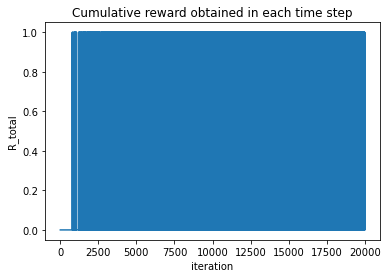

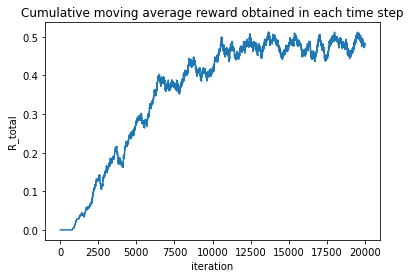

In [21]:
# Plotting Gk

plt.plot(range(len(Gk)),Gk)
plt.xlabel('iteration')
plt.ylabel('R_total')
plt.title('Cumulative reward obtained in each time step')
plt.show()

plt.plot(range(len(movavg(Gk))),movavg(Gk))
plt.xlabel('iteration')
plt.ylabel('R_total')
plt.title('Cumulative moving average reward obtained in each time step')
plt.show()

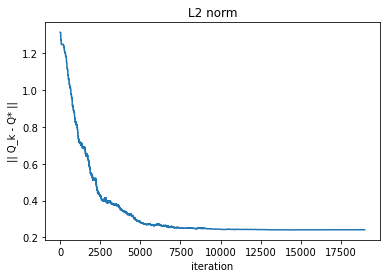

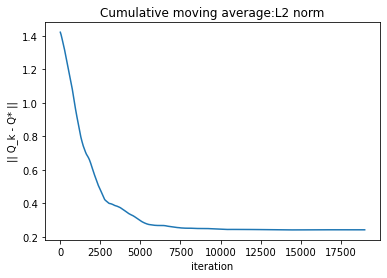

In [25]:
# Plotting L2 norm values of Q

plt.plot(range(len(norm2)-1000),norm2[1000:])
plt.xlabel('iteration')
plt.ylabel('|| Q_k - Q* ||')
plt.title('L2 norm')
plt.show()

plt.plot(range(len(movavg(norm2))-1000),movavg(norm2)[1000:])
plt.xlabel('iteration')
plt.ylabel('|| Q_k - Q* ||')
plt.title('Cumulative moving average:L2 norm')
plt.show()

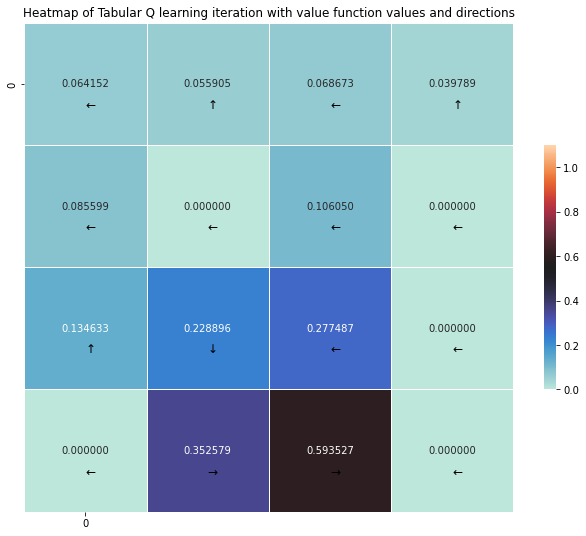

In [23]:
# plotting the heat map
fancy_visual(V,policy) 

In [17]:
# printing policy,value function, Q
print('Final policy:',policy)
print('Value function:',V)
print('Q:',Qlearn)

Final policy: [0, 3, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]
Value function: [0.06792871113534447, 0.06165055396576325, 0.07614009480102188, 0.022039569190516476, 0.09121246705427896, 0.0, 0.11604080285310384, 0.0, 0.14605124739587863, 0.24794953631498678, 0.29813507905169334, 0.0, 0.0, 0.3810974828920869, 0.6374331874061571, 0.0]
Q: [[0.06792871 0.06411728 0.06507762 0.05835567]
 [0.0345906  0.03759397 0.04193122 0.06165055]
 [0.07614009 0.0515929  0.05769502 0.03755524]
 [0.02203957 0.00572883 0.00178917 0.00908296]
 [0.09121247 0.06744629 0.0663575  0.04625497]
 [0.         0.         0.         0.        ]
 [0.1160408  0.08156152 0.08472282 0.01558348]
 [0.         0.         0.         0.        ]
 [0.07027359 0.11326764 0.09638138 0.14605125]
 [0.15799022 0.24794954 0.17446812 0.14625439]
 [0.29813508 0.25253541 0.19096193 0.09449487]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.17886114 0.32848826 0.38109748 0.26739854]
 [0.